In [5]:
import os
from dotenv import load_dotenv
load_dotenv()

from langchain_groq import ChatGroq


os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
#os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")


#llm=ChatGroq(model="qwen-2.5-32b")
#llm = ChatOpenAI(model="gpt-4o")
#result=llm.invoke("Hello")
#result

In [1]:
from langgraph.graph import StateGraph, START, END
from typing_extensions import TypedDict

from pydantic import BaseModel

from typing_extensions import Literal
from pydantic import BaseModel, Field
from langchain_core.messages import HumanMessage, SystemMessage





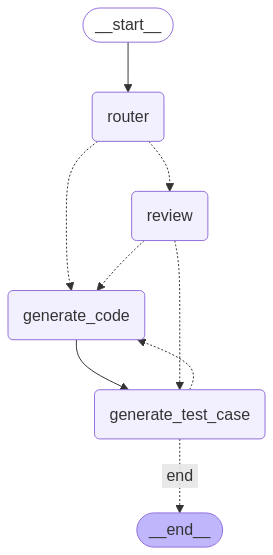

In [2]:
from typing import TypedDict
from langchain_core.messages import SystemMessage, HumanMessage
from IPython.display import Image, display
from langchain_openai import ChatOpenAI  # Example LLM import - adjust based on your setup

# Initialize LLM objects (you'll need to adjust this based on your specific LLM setup)
llm = ChatOpenAI(model="gpt-3.5-turbo")  # For code generation/review
llm_router = ChatOpenAI(model="gpt-3.5-turbo")  # For routing decisions

class State(TypedDict):
    input: str
    decision: str
    output: str
    test_result: bool
    review_result: bool

# Nodes
def review(state: State):
    """Review the code"""
    print("Reviewing the code")
    result = llm.invoke(state["input"])
    review_passed = True  # Simulated review result
    return {"output": result.content, "review_result": review_passed}

def generate_code(state: State):
    """generate code"""
    print("Generating code")
    result = llm.invoke(state["input"])
    return {"output": result.content}

def generate_test_case(state: State):
    """generate test case also show the test result"""
    print("Generating test case")
    result = llm.invoke(state["input"])
    test_passed = True  # Simulated test result
    return {"output": result.content, "test_result": test_passed}

def router(state: State):
    """Route the input to the appropriate node"""
    decision = llm_router.invoke(  # Use the LLM object here
        [
            SystemMessage(
                content="Route the input to generate code or review the code."
            ),
            HumanMessage(content=state["input"]),
        ]
    )
    return {"decision": decision.content}  # Adjust based on your LLM's response format

# Conditional edge function for initial routing
def route_decision(state: State):
    if "generate code" in state["decision"].lower():
        return "generate_code"
    elif "review the code" in state["decision"].lower():
        return "review"
    return "generate_code"  # Default case

# Conditional edge function for test case results
def route_test_result(state: State):
    if state["test_result"]:
        return "end"
    return "generate_code"

# Conditional edge function for review results
def route_review_result(state: State):
    if state["review_result"]:
        return "generate_test_case"
    return "generate_code"

# Build workflow
router_builder = StateGraph(State)

# Add nodes
router_builder.add_node("generate_code", generate_code)
router_builder.add_node("review", review)
router_builder.add_node("generate_test_case", generate_test_case)
router_builder.add_node("router", router)

# Add edges to connect nodes
router_builder.add_edge(START, "router")
router_builder.add_conditional_edges(
    "router",
    route_decision,
    {
        "generate_code": "generate_code",
        "review": "review",
    },
)
router_builder.add_conditional_edges(
    "review",
    route_review_result,
    {
        "generate_test_case": "generate_test_case",
        "generate_code": "generate_code"
    }
)
router_builder.add_edge("generate_code", "generate_test_case")
router_builder.add_conditional_edges(
    "generate_test_case",
    route_test_result,
    {
        "end": END,
        "generate_code": "generate_code"
    }
)

# Compile workflow
router_workflow = router_builder.compile()

# Show the workflow
display(Image(router_workflow.get_graph().draw_mermaid_png()))

In [3]:
# Invoke the workflow
initial_state = {
    "input": """import java.util.PriorityQueue;

public class MergeKSortedLists {
    public ListNode mergeKLists(ListNode[] lists) {
        PriorityQueue<ListNode> minHeap = new PriorityQueue<>((a, b) -> a.val - b.val);
        for (ListNode list : lists) {
            if (list != null) {
                minHeap.offer(list);
            }
        }
        
        ListNode dummy = new ListNode(0);
        ListNode current = dummy;
        
        while (!minHeap.isEmpty()) {
            ListNode node = minHeap.poll();
            current.next = node;
            current = current.next;
            if (node.next != null) {
                minHeap.offer(node.next);
            }"""
}

try:
    # Execute the workflow
    final_state = router_workflow.invoke(initial_state)
    
    # Print the output
    print(final_state["output"])
except Exception as e:
    print(f"An error occurred: {str(e)}")

Generating code
Generating test case
        }
        
        return dummy.next;
    }
}


In [4]:
# Invoke
state = router_workflow.invoke({"input": "Find Merge k Sorted Lists code in java and show test case also" })
   
print(state["output"])

Generating code
Generating test case
Here is an implementation of the Merge k Sorted Lists problem in Java:

```java
import java.util.PriorityQueue;

class ListNode {
    int val;
    ListNode next;
    ListNode(int x) { val = x; }
}

class Solution {
    public ListNode mergeKLists(ListNode[] lists) {
        if (lists == null || lists.length == 0) {
            return null;
        }
        
        PriorityQueue<ListNode> pq = new PriorityQueue<>((a, b) -> a.val - b.val);
        
        for (ListNode list : lists) {
            if (list != null) {
                pq.offer(list);
            }
        }
        
        ListNode dummy = new ListNode(0);
        ListNode curr = dummy;
        
        while (!pq.isEmpty()) {
            ListNode node = pq.poll();
            curr.next = node;
            curr = curr.next;
            
            if (node.next != null) {
                pq.offer(node.next);
            }
        }
        
        return dummy.next;
    }
}

public